# Airline delay in January 2019  project

This is the first part of flight delay  for the month of January.
This data is collected from the Bureau of Transportation Statistics, Govt. of the USA. This data is open-sourced under U.S. Govt. Works. It contains all the flights in the month of January 2019. There are more than 400,000 flights in the month of January itself throughout the United States. The features were manually chosen to do a primary time series analysis. There are several other features available on their website.

This data will be used to predict the flight delay at the destination airport specifically for the month of January in upcoming years as the data is for January only.

## Exploring dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm

In [2]:
df=pd.read_csv("Jan_2019_ontime.csv")
df.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


Column information:
- DAY_OF_MONTH - Day of Month
- DAY_OF_WEEK - Day of Week starting from Monday
- OP_UNIQUE_CARRIER - Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1)
- OP_CARRIER_AIRLINE_ID - An identification number assigned by US DOT to identify a unique airline (carrier)
- OP_CARRIER - Code assigned by IATA and commonly used to identify a carrier
- TAIL_NUM - Tail Number
- OP_CARRIER_FL_NUM - Flight Number 
- ORIGIN_AIRPORT_ID - Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport
- ORIGIN_AIRPORT_SEQ_ID - Origin Airport, Airport Sequence ID. An identification number assigned by US DOT to identify a unique airport
- ORIGIN - Origin Airport
- DEST_AIRPORT_ID - Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport
- DEST_AIRPORT_SEQ_ID - Destination Airport, Airport Sequence ID. An identification number assigned by US DOT to identify a unique airport
- DEST - Destination Airport
- DEP_TIME - Actual Departure Time (local time: hhmm)
- DEP_DEL15 - Departure Delay Indicator, 15 Minutes or More (1=Yes, 0=No)
- DEP_TIME_BLK - Departure Time Block, Hourly Intervals
- ARR_TIME - Actual Arrival Time (local time: hhmm)
- ARR_DEL15 - Arrival Delay Indicator, 15 Minutes or More (1=Yes, 0=No)
- CANCELLED - Cancelled Flight Indicator (1=Yes, 0=No)
- DIVERTED - Diverted Flight Indicator (1=Yes, 0=No)
- DISTANCE - Distance between airports (miles)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

In [4]:
df.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
count,583985.000000,583985.000000,583985.000000,583985.000000,583985.000000,5.839850e+05,583985.000000,5.839850e+05,567633.000000,567630.000000,566924.000000,565963.000000,583985.000000,583985.000000,583985.000000,0.0
mean,15.960088,3.835626,19983.213168,2537.869334,12659.701982,1.265974e+06,12659.470015,1.265951e+06,1331.957814,0.174281,1484.315921,0.185917,0.028641,0.002219,797.742767,NaN
std,8.987942,1.921899,377.724638,1821.736145,1519.405493,1.519403e+05,1519.336466,1.519334e+05,495.404020,0.379351,523.162855,0.389040,0.166796,0.047056,589.999261,NaN
min,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013505e+06,10135.000000,1.013505e+06,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,31.000000,NaN
25%,8.000000,2.000000,19790.000000,979.000000,11292.000000,1.129202e+06,11292.000000,1.129202e+06,921.000000,0.000000,1104.000000,0.000000,0.000000,0.000000,363.000000,NaN
50%,16.000000,4.000000,19977.000000,2114.000000,12889.000000,1.288903e+06,12889.000000,1.288903e+06,1328.000000,0.000000,1517.000000,0.000000,0.000000,0.000000,640.000000,NaN
75%,24.000000,5.000000,20368.000000,3902.000000,13931.000000,1.393102e+06,13931.000000,1.393102e+06,1738.000000,0.000000,1919.000000,0.000000,0.000000,0.000000,1037.000000,NaN
max,31.000000,7.000000,20452.000000,7439.000000,16218.000000,1.621802e+06,16218.000000,1.621802e+06,2400.000000,1.000000,2400.000000,1.000000,1.000000,1.000000,4983.000000,NaN


In [5]:
#Calculating missing values
df.isnull().sum()

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                   2543
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                  16352
DEP_DEL15                 16355
DEP_TIME_BLK                  0
ARR_TIME                  17061
ARR_DEL15                 18022
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              583985
dtype: int64

In [6]:
df.shape

(583985, 22)

In [7]:
#Droping column with no values
df2=df.drop(["Unnamed: 21"],axis=1)

In [8]:
df2.isnull().sum()

DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
OP_CARRIER_AIRLINE_ID        0
OP_CARRIER                   0
TAIL_NUM                  2543
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
ORIGIN_AIRPORT_SEQ_ID        0
ORIGIN                       0
DEST_AIRPORT_ID              0
DEST_AIRPORT_SEQ_ID          0
DEST                         0
DEP_TIME                 16352
DEP_DEL15                16355
DEP_TIME_BLK                 0
ARR_TIME                 17061
ARR_DEL15                18022
CANCELLED                    0
DIVERTED                     0
DISTANCE                     0
dtype: int64

In [9]:
df2.shape

(583985, 21)

In [10]:
df3=df2.copy()

In [11]:
#changing column names into lower case
df3.columns=df2.columns.str.lower()

In [12]:
df3.head()

,day_of_month,day_of_week,op_unique_carrier,op_carrier_airline_id,op_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin_airport_seq_id,origin,...,dest_airport_seq_id,dest,dep_time,dep_del15,dep_time_blk,arr_time,arr_del15,cancelled,diverted,distance
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0


In [13]:
df3["op_unique_carrier"].unique()

array(['9E', 'AA', 'MQ', 'G4', 'OH', 'B6', 'YV', 'EV', 'F9', 'YX', 'HA',
       'NK', 'OO', 'WN', 'AS', 'UA', 'DL'], dtype=object)

In [14]:
df3["op_carrier"].unique()

array(['9E', 'AA', 'MQ', 'G4', 'OH', 'B6', 'YV', 'EV', 'F9', 'YX', 'HA',
       'NK', 'OO', 'WN', 'AS', 'UA', 'DL'], dtype=object)

We can see that columns "op_carrier" and "op_unique_carrier" are the same so I m going to drop them and other columns that have same values.

In [15]:
df4=df3.drop(["op_unique_carrier","origin_airport_id","dest_airport_id"],axis=1)
df4.head()

,day_of_month,day_of_week,op_carrier_airline_id,op_carrier,tail_num,op_carrier_fl_num,origin_airport_seq_id,origin,dest_airport_seq_id,dest,dep_time,dep_del15,dep_time_blk,arr_time,arr_del15,cancelled,diverted,distance
0,1,2,20363,9E,N8688C,3280,1195302,GNV,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0
1,1,2,20363,9E,N348PQ,3281,1348702,MSP,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0
2,1,2,20363,9E,N8896A,3282,1143302,DTW,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0
3,1,2,20363,9E,N8886A,3283,1524906,TLH,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0
4,1,2,20363,9E,N8974C,3284,1039707,ATL,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0


In [16]:
#replacing values with words in column day_of_week
df5=df4.copy()
df5["day_of_week"]=df5["day_of_week"].replace(1,"Monday").replace(2,"Tuesday").replace(3,"Wednesday").replace(4,"Thursday").replace(5,"Friday").replace(6,"Saturday").replace(7,"Sunday")

In [17]:
df5.head()

,day_of_month,day_of_week,op_carrier_airline_id,op_carrier,tail_num,op_carrier_fl_num,origin_airport_seq_id,origin,dest_airport_seq_id,dest,dep_time,dep_del15,dep_time_blk,arr_time,arr_del15,cancelled,diverted,distance
0,1,Tuesday,20363,9E,N8688C,3280,1195302,GNV,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0
1,1,Tuesday,20363,9E,N348PQ,3281,1348702,MSP,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0
2,1,Tuesday,20363,9E,N8896A,3282,1143302,DTW,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0
3,1,Tuesday,20363,9E,N8886A,3283,1524906,TLH,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0
4,1,Tuesday,20363,9E,N8974C,3284,1039707,ATL,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0


In [18]:
# Calculating number of cancelled flights per day 
days=df5["day_of_month"].value_counts()
day_m=days.index

days_cancelled={}
for day in day_m:
    days_only=df5[df5["day_of_month"]==day]
    cancel=len(days_only[days_only["cancelled"]==1])
    days_cancelled[day]=int(cancel)
days_cancelled

dys_canc=pd.Series(days_cancelled)
print(dys_canc.sort_values(ascending=False))


30    2145
31    1775
19    1513
28    1447
20    1175
29    1158
22    1138
13     720
21     599
23     596
24     421
18     415
12     329
16     303
6      295
14     251
15     249
11     219
27     204
17     199
25     191
8      189
10     183
9      175
2      173
1      141
3      134
5      129
7      116
26      73
4       71
dtype: int64


We can see that on January 30th had the most cancelled flights 2145 and on January 4th had least cancelled flights only 71. We can see that at the end of the month we have more cancelled flights.

We want to predict if some flight will delayed in time - arrival. Since column "arr_del15" describes if  the flight delays or not we will use that column as a target and create new column "delay" with same values.

In [19]:
df5['delayed'] = df5['arr_del15']

In [20]:
df5.head()

,day_of_month,day_of_week,op_carrier_airline_id,op_carrier,tail_num,op_carrier_fl_num,origin_airport_seq_id,origin,dest_airport_seq_id,dest,dep_time,dep_del15,dep_time_blk,arr_time,arr_del15,cancelled,diverted,distance,delayed
0,1,Tuesday,20363,9E,N8688C,3280,1195302,GNV,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,0.0
1,1,Tuesday,20363,9E,N348PQ,3281,1348702,MSP,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,0.0
2,1,Tuesday,20363,9E,N8896A,3282,1143302,DTW,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,0.0
3,1,Tuesday,20363,9E,N8886A,3283,1524906,TLH,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,0.0
4,1,Tuesday,20363,9E,N8974C,3284,1039707,ATL,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,0.0


In [21]:
# Calculating number of delayed flights per day
days=df5["day_of_month"].value_counts()
day_m=days.index

days_delayed={}
for day in day_m:
    days_only=df5[df5["day_of_month"]==day]
    delay=len(days_only[days_only["delayed"]==1])
    days_delayed[day]=int(delay)
days_delayed

dys_del=pd.Series(days_delayed)
print(dys_del.sort_values(ascending=False))

24    6084
2     5203
21    5073
23    5037
25    4494
18    4278
17    3947
22    3929
1     3844
6     3790
31    3787
3     3601
30    3451
27    3447
20    3290
28    3290
11    3184
7     3009
14    2978
13    2883
15    2848
10    2830
19    2691
5     2676
29    2550
4     2474
16    2422
12    2250
26    2025
9     1969
8     1888
dtype: int64


We can see that on January 24th we  had most delayed flights 6 084  and on January 9th least delayed flights 1 888.

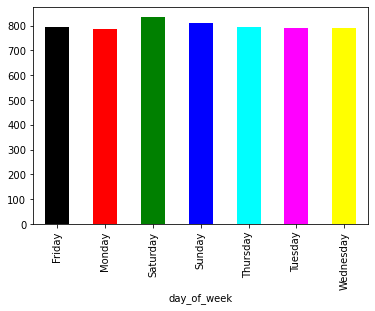

In [22]:
#Bar plot of  average distance per day week
df5.groupby('day_of_week')["distance"].mean().plot.bar(color=['black', 'red', 'green', 'blue', 'cyan',"magenta","yellow"])
plt.show()



We don't see any correlations between distance per week day

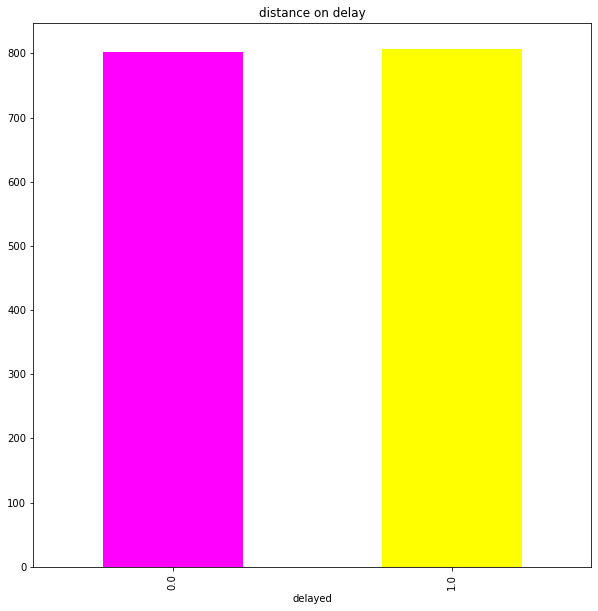

In [23]:
#Bar plot of correlations between delayed or not delayed flights per average distance
plt.figure(figsize=(10,10))
df5.groupby("delayed")["distance"].mean().plot.bar(title="distance on delay",color=['magenta','yellow'])
plt.show()

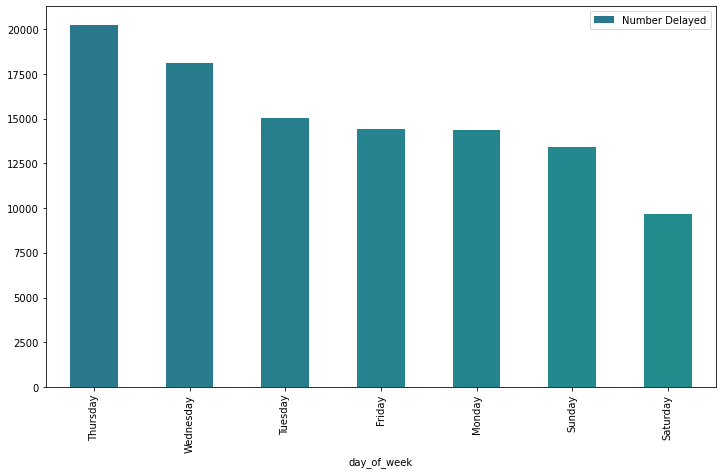

In [24]:
# Count delayes per  days of week
count_delayed=df5.groupby('day_of_week')['delayed'].apply(lambda x: (x==1).sum()).reset_index(name='Number Delayed')

color = cm.viridis(np.linspace(.4, .8, 30))

count_delayed= count_delayed.sort_values("Number Delayed" , ascending=[False])
count_delayed.plot.bar(x='day_of_week', y='Number Delayed', color=color , figsize=(12,7))

We can see that on thusrdays we had the most delayed flights and on Saturday we had least delayed flights.

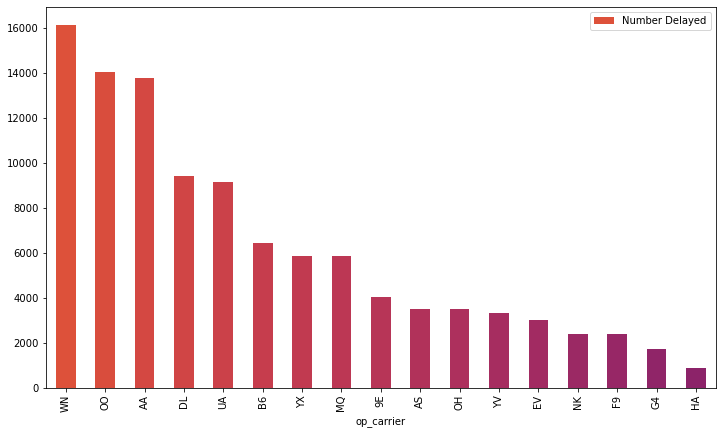

In [25]:
# Count delayes by company
count_delayed=df5.groupby('op_carrier')['delayed'].apply(lambda x: (x==1).sum()).reset_index(name='Number Delayed')

color = cm.inferno_r(np.linspace(.4, .8, 30))

count_delayed= count_delayed.sort_values("Number Delayed" , ascending=[False])
count_delayed.plot.bar(x='op_carrier', y='Number Delayed', color=color , figsize=(12,7))

WN company has the most delayed flights.

## Cleaning dataset

In [26]:
df5.isnull().sum()

day_of_month                 0
day_of_week                  0
op_carrier_airline_id        0
op_carrier                   0
tail_num                  2543
op_carrier_fl_num            0
origin_airport_seq_id        0
origin                       0
dest_airport_seq_id          0
dest                         0
dep_time                 16352
dep_del15                16355
dep_time_blk                 0
arr_time                 17061
arr_del15                18022
cancelled                    0
diverted                     0
distance                     0
delayed                  18022
dtype: int64

In [27]:
df6=df5.dropna()
df6.isnull().sum()

day_of_month             0
day_of_week              0
op_carrier_airline_id    0
op_carrier               0
tail_num                 0
op_carrier_fl_num        0
origin_airport_seq_id    0
origin                   0
dest_airport_seq_id      0
dest                     0
dep_time                 0
dep_del15                0
dep_time_blk             0
arr_time                 0
arr_del15                0
cancelled                0
diverted                 0
distance                 0
delayed                  0
dtype: int64

In [28]:
#removing columns
df7=df6.drop(["op_carrier_airline_id","tail_num","op_carrier_fl_num","origin_airport_seq_id","dest_airport_seq_id","arr_del15","cancelled","dest","diverted"],axis=1)
df7.head()

,day_of_month,day_of_week,op_carrier,origin,dep_time,dep_del15,dep_time_blk,arr_time,distance,delayed
0,1,Tuesday,9E,GNV,601.0,0.0,0600-0659,722.0,300.0,0.0
1,1,Tuesday,9E,MSP,1359.0,0.0,1400-1459,1633.0,596.0,0.0
2,1,Tuesday,9E,DTW,1215.0,0.0,1200-1259,1329.0,229.0,0.0
3,1,Tuesday,9E,TLH,1521.0,0.0,1500-1559,1625.0,223.0,0.0
4,1,Tuesday,9E,ATL,1847.0,0.0,1900-1959,1940.0,579.0,0.0


In [29]:
#Calculating unique values in "origin" column
len(df7["origin"].unique())

346

In [30]:
origin_stats=df7["origin"].value_counts()
origin_stats

ATL    30783
ORD    23336
DFW    22705
CLT    18772
DEN    18220
       ...  
OGS       10
HGR       10
OWB        9
ADK        9
OGD        8
Name: origin, Length: 346, dtype: int64

In [31]:
# Destinations with less then 5000 flights 
len(origin_stats[origin_stats<=5000])

315

In [32]:
origin_less_1000=origin_stats[origin_stats<=5000]
origin_less_1000

HOU    4923
AUS    4879
SJC    4841
PDX    4704
RDU    4669
       ... 
OGS      10
HGR      10
OWB       9
ADK       9
OGD       8
Name: origin, Length: 315, dtype: int64

In [33]:
df8=df7.copy()

In [34]:
#MOving  airport origins with flights less then 5000 to category "other"
df8["origin"]=df7["origin"].apply(lambda x: "other" if x in origin_less_1000 else x)
len(df8["origin"].unique())

32

In [35]:
# Spliting range numbers into two number and calculating mean of them
def convert_dep_time_blk(x):
    tokens=x.split("-")
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [36]:
df9=df8.copy()

In [37]:
df9["dep_time_blk"]=df9["dep_time_blk"].apply(convert_dep_time_blk)
df9.head()

,day_of_month,day_of_week,op_carrier,origin,dep_time,dep_del15,dep_time_blk,arr_time,distance,delayed
0,1,Tuesday,9E,other,601.0,0.0,629.5,722.0,300.0,0.0
1,1,Tuesday,9E,MSP,1359.0,0.0,1429.5,1633.0,596.0,0.0
2,1,Tuesday,9E,DTW,1215.0,0.0,1229.5,1329.0,229.0,0.0
3,1,Tuesday,9E,other,1521.0,0.0,1529.5,1625.0,223.0,0.0
4,1,Tuesday,9E,ATL,1847.0,0.0,1929.5,1940.0,579.0,0.0


In [38]:
df9["delayed"].value_counts()

0.0    460741
1.0    105222
Name: delayed, dtype: int64

Because we have a lot more values with flights who arrived on time. We need to balance our data so we can get better results.To do that we will equalize number of values with delay flights and not delay flights.

In [39]:
#Balance dataset by equalizing delay and not delay values
delay= df9.loc[df9.delayed == 1]
no_delay= df9.loc[df9.delayed == 0]

# Merge the balanced data
df10 = pd.concat([delay, no_delay.sample(n = len(delay))], axis = 0)

# Shuffle the order of data
df11 = df10.sample(n = len(df10)).reset_index(drop = True)


In [40]:
df11["delayed"].value_counts()

1.0    105222
0.0    105222
Name: delayed, dtype: int64

In [41]:
df11.shape

(210444, 10)

In [42]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210444 entries, 0 to 210443
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   day_of_month  210444 non-null  int64  
 1   day_of_week   210444 non-null  object 
 2   op_carrier    210444 non-null  object 
 3   origin        210444 non-null  object 
 4   dep_time      210444 non-null  float64
 5   dep_del15     210444 non-null  float64
 6   dep_time_blk  210444 non-null  float64
 7   arr_time      210444 non-null  float64
 8   distance      210444 non-null  float64
 9   delayed       210444 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 13.6+ MB


## Correlations

In [43]:
df11.corr()

,day_of_month,dep_time,dep_del15,dep_time_blk,arr_time,distance,delayed
day_of_month,1.000000,-0.000343,0.037665,-0.009972,0.000643,-0.020158,0.050463
dep_time,-0.000343,1.000000,0.256164,0.914253,0.540278,-0.042689,0.182634
dep_del15,0.037665,0.256164,1.000000,0.179264,0.100344,-0.013681,0.716482
dep_time_blk,-0.009972,0.914253,0.179264,1.000000,0.499128,-0.026570,0.119674
arr_time,0.000643,0.540278,0.100344,0.499128,1.000000,0.004904,0.075759
distance,-0.020158,-0.042689,-0.013681,-0.026570,0.004904,1.000000,0.004064
delayed,0.050463,0.182634,0.716482,0.119674,0.075759,0.004064,1.000000


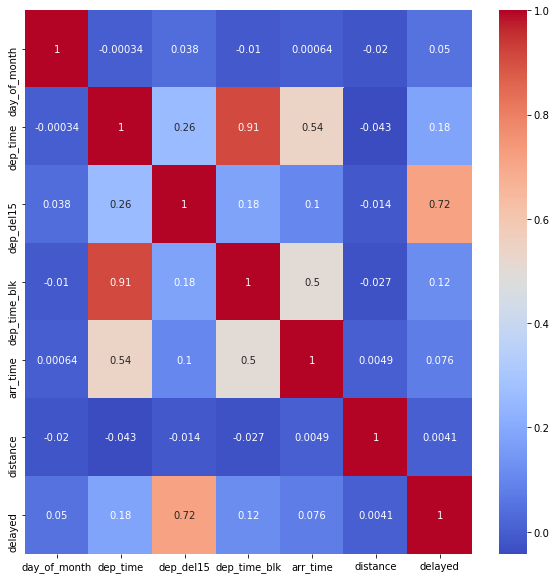

In [44]:
# visualizing correlations 
plt.figure(figsize=(10,10))
sns.heatmap(df11.corr(), annot=True, cmap='coolwarm')

We see that "dep_time" column and "dep_time_blk" have strong correlations and so we wil drop one of that column.

In [45]:
df12=df11.drop(["dep_time_blk"],axis=1)

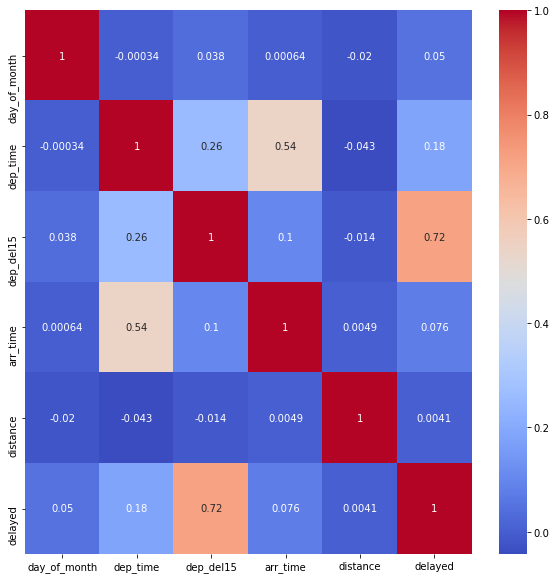

In [46]:
# visualizing correlations 
plt.figure(figsize=(10,10))
sns.heatmap(df12.corr(), annot=True, cmap='coolwarm')

Everything looks fine now we can prepare our features.

## Preparing features

In [47]:
# function for creating dummies
def create_dummies(df,column_name):
    dummies=pd.get_dummies(df[column_name],prefix=column_name)
    df=pd.concat([df,dummies],axis=1)
    return df

In [48]:
#creating dummies
df13=create_dummies(df12,"day_of_week")
df14=df13.drop(["day_of_week"],axis=1)

df15=create_dummies(df14,"op_carrier")
df16=df15.drop(["op_carrier"],axis=1)

df17=create_dummies(df16,"origin")
df18=df17.drop(["origin"],axis=1)

In [49]:
df18.head()

,day_of_month,dep_time,dep_del15,arr_time,distance,delayed,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,...,origin_ORD,origin_PHL,origin_PHX,origin_SAN,origin_SEA,origin_SFO,origin_SLC,origin_STL,origin_TPA,origin_other
0,8,1058.0,0.0,1250.0,601.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,17,1551.0,0.0,1936.0,989.0,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,24,940.0,0.0,1111.0,630.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1840.0,0.0,2046.0,1609.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,2242.0,0.0,2358.0,264.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
df19=df18.drop(["origin_other"],axis=1)
df19.head()

,day_of_month,dep_time,dep_del15,arr_time,distance,delayed,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,...,origin_MSP,origin_ORD,origin_PHL,origin_PHX,origin_SAN,origin_SEA,origin_SFO,origin_SLC,origin_STL,origin_TPA
0,8,1058.0,0.0,1250.0,601.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17,1551.0,0.0,1936.0,989.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,24,940.0,0.0,1111.0,630.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1840.0,0.0,2046.0,1609.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23,2242.0,0.0,2358.0,264.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Building predictive models

Selection of an error metric
Scikit-learn has a handy function we can use to calculate accuracy: metrics.accuracy_score(). The function accepts two parameters, the actual values and our predicted values, and returns our accuracy score.

To give us a better understanding of the real performance of our model, we can use a technique called cross validation to train and test our model on different splits of our data, and then average the accuracy scores. The most common form of cross validation, and the one we will be using, is called k-fold cross validation. 'Fold' refers to each different iteration that we train our model on, and 'k' just refers to the number of folds

In [51]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

### Train and test split

In [52]:
# splitting the data
from sklearn.model_selection import train_test_split

X=df19.drop(['delayed'], axis=1)
y=df19['delayed']

train_X, test_X, train_y, test_y=train_test_split(X, y, train_size=0.8, random_state=1)

### Random Forests model

In [53]:
# import RandomForestClassifier and make an instance 
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators=5, random_state=1, min_samples_leaf=2)

In [54]:
# fitting the model
rfc.fit(train_X, train_y)

RandomForestClassifier(min_samples_leaf=2, n_estimators=5, random_state=1)

In [55]:
#Calculating predictions 
predictions_rfc=rfc.predict(test_X)

### Accuracy of model by accuracy_score

In [56]:
# calculating accuracy with accuracy_score()
accuracy_rfc=accuracy_score(test_y, predictions_rfc)
accuracy_rfc

0.8581814725937893

### Accuracy of model by cros_val_score

In [57]:
#calculating accuracy result with cross_val_score()
accuracy_cross_val_rfc=cross_val_score(rfc, X, y, cv=10)
accuracy_cross_val_rfc

array([0.86291281, 0.85868377, 0.85787598, 0.86628653, 0.86623266,
       0.86034024, 0.86271621, 0.86309637, 0.8619559 , 0.86333397])

### Average accuracy of cros_val_score

In [58]:
mean=np.mean(accuracy_cross_val_rfc)
mean

0.8623434434561507